In [5]:
#setup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

# 1. Import Data

In [6]:
data = pd.read_csv("churn.csv")
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [7]:
data.describe(include = 'all')

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
count,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000,20000,20000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,2
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,very_unsat,little,considering,STAY
freq,10048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7909,7875,7920,10148
mean,NaN,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,NaN,NaN,NaN,NaN
std,NaN,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,NaN,NaN,NaN,NaN
min,NaN,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,NaN,NaN,NaN,NaN
50%,NaN,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,NaN,NaN,NaN,NaN
75%,NaN,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,NaN,NaN,NaN,NaN


There is no missing value in this dataset

# 2. Exploratory Data Analysis

## 2.1 Categorical Values

### 2.1.1 Stay v Leave

The data is very balanced with similar number of staying and leaving customers

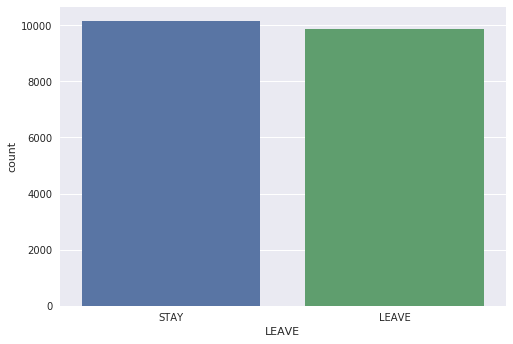

In [58]:
sns.countplot(x="LEAVE", data=data)
plt.show()

### 2.1.2 College Degree

The number of people that had and not had college degree is almost equal. It did not show any correlation with customer's tendency to churn.

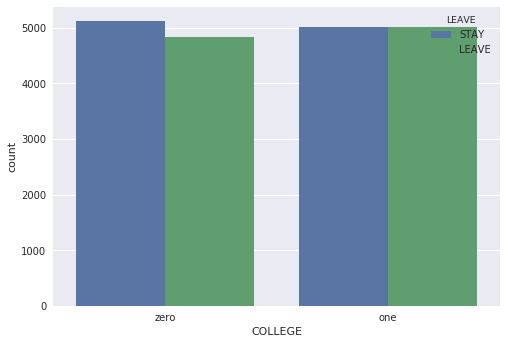

In [61]:
sns.countplot(x="COLLEGE", data=data, hue = 'LEAVE')
plt.show()

### 2.1.3 Satisfaction, Usage and Considering Change of Plan

Although I expect a strong association with of "very unsatisfied" and "leave", the data is rather equally split in each of those categories. There might be some errors with those fields.

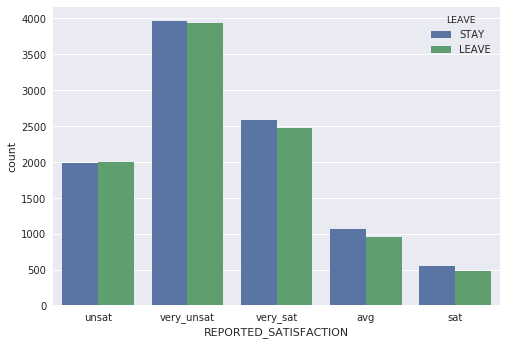

In [70]:
sns.countplot(x="REPORTED_SATISFACTION", data=data, hue = 'LEAVE')
plt.show()

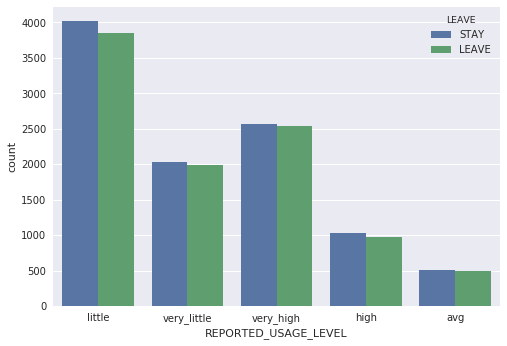

In [71]:
sns.countplot(x="REPORTED_USAGE_LEVEL", data=data, hue ='LEAVE')
plt.show()

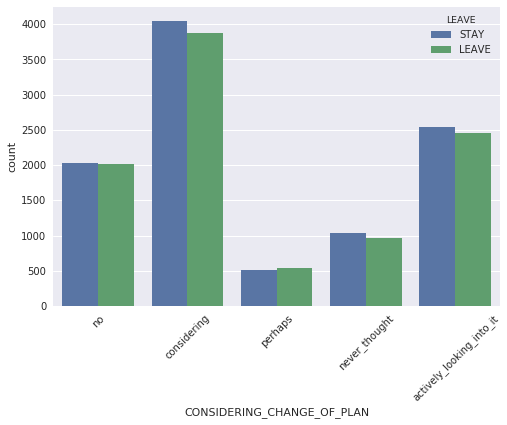

In [72]:
sns.countplot(x="CONSIDERING_CHANGE_OF_PLAN", data=data, hue = 'LEAVE')
plt.xticks(rotation=45)
plt.show()

## 2.2 Numeric Values

### 2.2.1 Income

It seems that people with income less than 100,000 are more likely to stay than leave, and the opposite for people with income above 100,000. A possible explaination is that the telecommunication company focus more on affordable service rather than premium. 

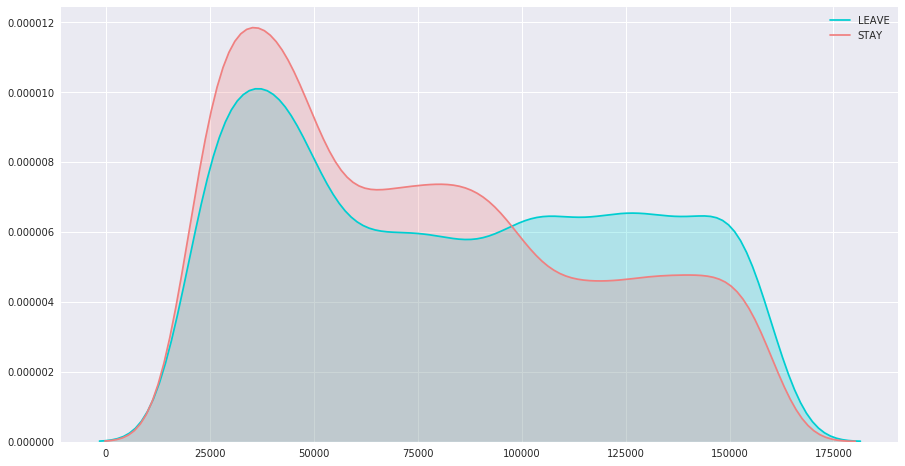

In [73]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["INCOME"][data.LEAVE == "LEAVE"], color="darkturquoise", shade=True)
sns.kdeplot(data["INCOME"][data.LEAVE == "STAY"], color="lightcoral", shade=True)
plt.legend(['LEAVE', 'STAY'])
plt.show()

### 2.2.2 Average Call Duration

The spike of leaving customers whose call duration is less than 2.5 minutes might be unsatisfied with technical difficulties that interrupted their calls.

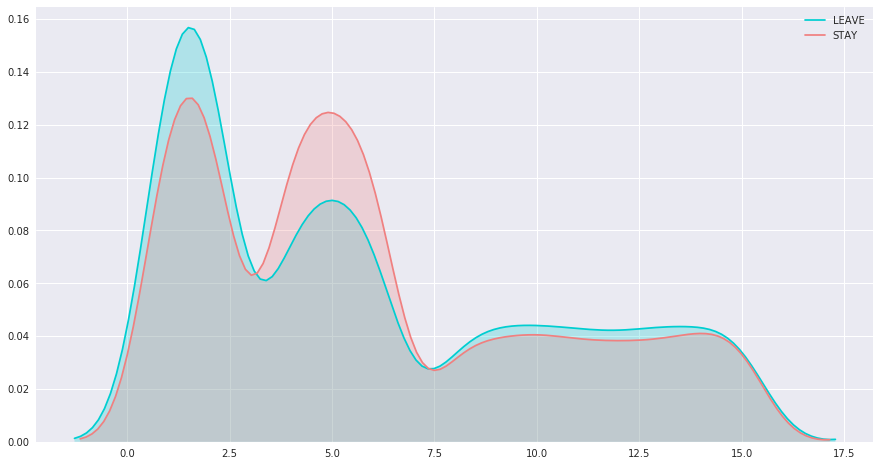

In [74]:
#AVERAGE_CALL_DURATION
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["AVERAGE_CALL_DURATION"][data.LEAVE == "LEAVE"], color="darkturquoise", shade=True)
sns.kdeplot(data["AVERAGE_CALL_DURATION"][data.LEAVE == "STAY"], color="lightcoral", shade=True)
plt.legend(['LEAVE', 'STAY'])
plt.show()

# 3. Building Predictive Model

## 3.1 Data Preparation

In [75]:
#Transform categorical values to encoding
data['college'] = [0 if i == 'zero' else 1 for i in data.loc[:,'COLLEGE']]
data['churn'] = [0 if i == 'STAY' else 1 for i in data.loc[:,'LEAVE']]
REPORTED_SATISFACTION_dummies = pd.get_dummies(data.REPORTED_SATISFACTION, prefix='satisfaction').iloc[:, 1:]
REPORTED_USAGE_LEVEL_dummies = pd.get_dummies(data.REPORTED_USAGE_LEVEL, prefix='usage').iloc[:, 1:]
CONSIDERING_CHANGE_dummies = pd.get_dummies(data.CONSIDERING_CHANGE_OF_PLAN, prefix='change_plan').iloc[:, 1:]
data2 = pd.concat([data, REPORTED_SATISFACTION_dummies, REPORTED_USAGE_LEVEL_dummies,
                  CONSIDERING_CHANGE_dummies], axis=1)

In [76]:
data2 = data2.drop(columns=['COLLEGE', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 
                 'CONSIDERING_CHANGE_OF_PLAN','LEAVE'])

In [77]:
#Split test/train data
from sklearn.model_selection import train_test_split

x,y = data2.loc[:,data2.columns != 'churn'], data.loc[:,'churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## 3.2 Building Model - Random Forest

### 3.2.1 Parameter Selection: selecting the best hyperparameter based on lowest cross-validation error

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [79]:
lowest_cross_val_error = np.inf
best_hyperparameter_setting = None
num_folds = 5
k_fold = KFold(num_folds)

hyperparameter_settings = [(num_trees, max_depth)
                           for num_trees in [50, 100, 150]
                           for max_depth in [5, 10, 15, None]]

indices = range(len(y_train))

for hyperparameter_setting in hyperparameter_settings:
    num_trees, max_depth = hyperparameter_setting
    errors = []
    for train_indices, val_indices in k_fold.split(indices):
        classifier = RandomForestClassifier(n_estimators=num_trees,
                                            max_depth=max_depth,
                                            random_state=0)
        classifier.fit(x_train.iloc[train_indices,:],
                       y_train.iloc[train_indices])
        predicted_val_labels = classifier.predict(x_train.iloc[val_indices,:])

        error = np.mean(predicted_val_labels != y_train.iloc[val_indices])
        errors.append(error)
        
    cross_val_error = np.mean(errors)
    print('Hyperparameter:', hyperparameter_setting, 'Average cross-val error:', cross_val_error)

    if cross_val_error < lowest_cross_val_error:  # assumes that a higher score is better
        lowest_cross_val_error = cross_val_error
        best_hyperparameter_setting = hyperparameter_setting

print('Best hyperparameter:', best_hyperparameter_setting, 'error:', lowest_cross_val_error)
best_n_estimators = best_hyperparameter_setting[0]
best_max_depth = best_hyperparameter_setting[1]

Hyperparameter: (50, 5) Average cross-val error: 0.30593750000000003
Hyperparameter: (50, 10) Average cross-val error: 0.30725
Hyperparameter: (50, 15) Average cross-val error: 0.31050000000000005
Hyperparameter: (50, None) Average cross-val error: 0.31475
Hyperparameter: (100, 5) Average cross-val error: 0.3056875
Hyperparameter: (100, 10) Average cross-val error: 0.3055
Hyperparameter: (100, 15) Average cross-val error: 0.30599999999999994
Hyperparameter: (100, None) Average cross-val error: 0.31156249999999996
Hyperparameter: (150, 5) Average cross-val error: 0.3053125
Hyperparameter: (150, 10) Average cross-val error: 0.3045
Hyperparameter: (150, 15) Average cross-val error: 0.30643750000000003
Hyperparameter: (150, None) Average cross-val error: 0.311125
Best hyperparameter: (150, 10) error: 0.3045


The hyperparameters chosen are 150 trees and 10 max tree depths.

### 3.2.2 Fit and Predict: fit the model with parameters chosed above. 

In [80]:
classifier = RandomForestClassifier(n_estimators=best_n_estimators,
                                            max_depth=best_max_depth,
                                            random_state=0)
classifier.fit(x_train,y_train)
predicted_val_labels = classifier.predict(x_test)
error = np.mean(predicted_val_labels != y_test)
print(error)

0.29875


The testing error of the model on testing set is 0.29875

## 3.3 Model Evaluation

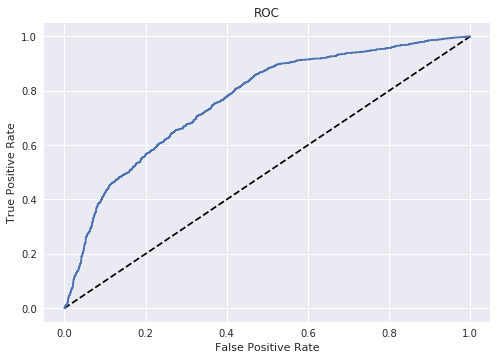

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

y_score = classifier.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

The closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test

In [56]:
target_names = ['STAY', 'LEAVE']
print(classification_report(y_test, predicted_val_labels, target_names=target_names))

              precision    recall  f1-score   support

        STAY       0.70      0.66      0.68      2012
       LEAVE       0.67      0.72      0.70      1988

   micro avg       0.69      0.69      0.69      4000
   macro avg       0.69      0.69      0.69      4000
weighted avg       0.69      0.69      0.69      4000



Using STAY as an example:

Precision means how many of the customers predicted as STAY are actually STAY (true positive)

Recall means how many of the STAY customers are identified as STAY